# Init

In [293]:
# !pip install -U pip pandas numpy matplotlib seaborn scikit-learn notebook mypy

import csv
import io
import re
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data

In [294]:
# Sanitize CSV

with open("pp_logs_lab.csv") as f:
    # tab = list(csv.reader(f))
    tab = f.readlines()
print(*tab[:800:273])

assert ";" not in "".join(tab)  # because we later want to replace all "," after the 4th occurrence with a unique symbol

for i, t in enumerate(tab):
    if t.startswith("\""):
        assert t.strip().endswith('"""')
        t = t.replace("\"", "")
        t = t.split(",", maxsplit = 4)
        t = t[:4] + [t[4].replace(",", ";")]
        tab[i] = ",".join(t)

print("".join(tab[:1000:273]))

,timestamp,host,protocol,agent
 "272,2022-11-01 11:01:34,193.2.1.88,1,""RIPE NCC RPKI Validator/3.1-2020.05.22.11.25, RIPE NCC RPKI Validator version 3"""
 545,2022-11-01 11:03:15,176.57.180.11,1,Routinator/0.7.1

,timestamp,host,protocol,agent
272,2022-11-01 11:01:34,193.2.1.88,1,RIPE NCC RPKI Validator/3.1-2020.05.22.11.25; RIPE NCC RPKI Validator version 3
545,2022-11-01 11:03:15,176.57.180.11,1,Routinator/0.7.1
818,2022-11-01 11:05:03,212.23.10.110,1,RIPE NCC RPKI Validator/3.1-2020.05.22.11.25; RIPE NCC RPKI Validator version 3



In [295]:
# df = pd.read_excel("pp_logs_lab.xlsx")
df = pd.read_csv(
    # "pp_logs_lab.csv",
    io.StringIO("".join(tab)),
    # sep = ";"
    index_col = 0,
    # verbose = True,
    na_values = ["-"],
    parse_dates = ["timestamp"],
    dtype = {
        "host": str,
        "protocol": "category",
        "agent": "category",
    }
    )
df

,timestamp,host,protocol,agent
0,2022-11-01 11:00:00,83.149.16.165,1,RIPE NCC RPKI Validator/3.2-2020.10.28.23.06
1,2022-11-01 11:00:00,178.49.132.37,1,Routinator/0.11.3
2,2022-11-01 11:00:00,63.216.149.110,1,Routinator/0.10.2
3,2022-11-01 11:00:00,66.97.30.162,1,Routinator/0.7.1
4,2022-11-01 11:00:00,31.13.137.210,1,Routinator/0.10.0
...,...,...,...,...
251362,2022-11-02 11:00:00,139.59.19.15,1,Routinator/0.8.3
251363,2022-11-02 11:00:00,212.169.92.145,1,Routinator/0.11.3
251364,2022-11-02 11:00:00,212.23.3.225,1,RIPE NCC RPKI Validator/3.1-2020.05.22.11.25; ...
251365,2022-11-02 11:00:00,37.208.106.99,1,Routinator/0.11.3


## Sanitize

In [296]:
pd.testing.assert_index_equal(
    df.index,
    pd.Index(np.arange(df.index.size)),
    # pd.Index(np.arange(df.index.size).astype(str).astype(object)),
    exact = False,
    check_exact = False,
    obj = "str",
)

np.testing.assert_array_equal(
    np.arange(df.index.size),
    # np.arange(df.index.size).astype(str).astype(object),
    df.index,
    verbose = True,
)

In [297]:
df[~(np.arange(df.index.size).astype(str).astype(object) == df.index)]

,timestamp,host,protocol,agent
0,2022-11-01 11:00:00,83.149.16.165,1,RIPE NCC RPKI Validator/3.2-2020.10.28.23.06
1,2022-11-01 11:00:00,178.49.132.37,1,Routinator/0.11.3
2,2022-11-01 11:00:00,63.216.149.110,1,Routinator/0.10.2
3,2022-11-01 11:00:00,66.97.30.162,1,Routinator/0.7.1
4,2022-11-01 11:00:00,31.13.137.210,1,Routinator/0.10.0
...,...,...,...,...
251362,2022-11-02 11:00:00,139.59.19.15,1,Routinator/0.8.3
251363,2022-11-02 11:00:00,212.169.92.145,1,Routinator/0.11.3
251364,2022-11-02 11:00:00,212.23.3.225,1,RIPE NCC RPKI Validator/3.1-2020.05.22.11.25; ...
251365,2022-11-02 11:00:00,37.208.106.99,1,Routinator/0.11.3


In [298]:
df[~(np.arange(df.index.size) == df.index)]

,timestamp,host,protocol,agent


In [299]:
for c in df.columns:
    print(c)
    display(df[df[c].isna()])
# df[df.isna().any(axis = 1)]

timestamp


,timestamp,host,protocol,agent


host


,timestamp,host,protocol,agent


protocol


,timestamp,host,protocol,agent


agent


,timestamp,host,protocol,agent
541,2022-11-01 11:03:13,154.70.243.198,2,NaN
5855,2022-11-01 11:34:38,23.138.113.35,2,NaN
6076,2022-11-01 11:35:43,154.70.243.198,2,NaN
6324,2022-11-01 11:37:20,95.179.159.79,2,NaN
7105,2022-11-01 11:41:58,143.110.209.140,2,NaN
...,...,...,...,...
239715,2022-11-02 09:56:05,144.208.88.122,2,NaN
240478,2022-11-02 09:58:07,143.110.209.140,2,NaN
246939,2022-11-02 10:34:40,154.70.243.198,2,NaN
247264,2022-11-02 10:37:19,95.179.159.79,2,NaN


## Stats

In [300]:
agents = df.agent.unique().tolist()
# agents = set([x.split("/")[0] if isinstance(x, str) else x for x in agents])
agents = set([re.split(r"/|\d|(?<=OctoRPKI) ", x)[0] if isinstance(x, str) else x for x in agents])
agents

{'Cloudflare-RPKI-RRDP',
 'Cloudflare-RRDP-OctoRPKI',
 'HTTP.jl',
 'Mozilla',
 'OpenBSD rpki-client',
 'RIPE NCC RPKI Validator',
 'Routinator',
 'Routinator ',
 'fort',
 nan,
 'reqwest',
 'rpki-prover-'}

In [301]:
df["uniq_agent"] = df.agent.apply(lambda x: re.split(r"/|\d|(?<=OctoRPKI) ", x)[0])
df

,timestamp,host,protocol,agent,uniq_agent
0,2022-11-01 11:00:00,83.149.16.165,1,RIPE NCC RPKI Validator/3.2-2020.10.28.23.06,RIPE NCC RPKI Validator
1,2022-11-01 11:00:00,178.49.132.37,1,Routinator/0.11.3,Routinator
2,2022-11-01 11:00:00,63.216.149.110,1,Routinator/0.10.2,Routinator
3,2022-11-01 11:00:00,66.97.30.162,1,Routinator/0.7.1,Routinator
4,2022-11-01 11:00:00,31.13.137.210,1,Routinator/0.10.0,Routinator
...,...,...,...,...,...
251362,2022-11-02 11:00:00,139.59.19.15,1,Routinator/0.8.3,Routinator
251363,2022-11-02 11:00:00,212.169.92.145,1,Routinator/0.11.3,Routinator
251364,2022-11-02 11:00:00,212.23.3.225,1,RIPE NCC RPKI Validator/3.1-2020.05.22.11.25; ...,RIPE NCC RPKI Validator
251365,2022-11-02 11:00:00,37.208.106.99,1,Routinator/0.11.3,Routinator


In [302]:
df.uniq_agent.value_counts()

Routinator                  209241
RIPE NCC RPKI Validator      20440
OpenBSD rpki-client           6642
Cloudflare-RRDP-OctoRPKI      6338
reqwest                       4158
fort                          2830
Cloudflare-RPKI-RRDP          1097
rpki-prover-                   262
Routinator                     130
HTTP.jl                        110
Mozilla                          1
Name: uniq_agent, dtype: int64

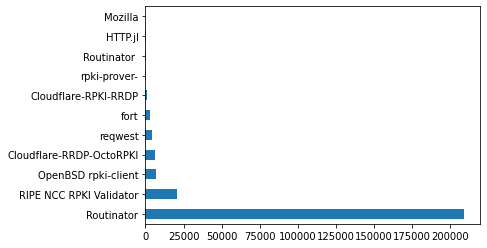

In [303]:
df.uniq_agent.value_counts().plot(kind = "barh");